<a href="https://colab.research.google.com/github/ARsire/gdp-dashboard/blob/main/CDD_ML_Part_2_Acetylcholinesterase_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**
we are building machine learning model with bioactivity data

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-26 08:33:05--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   198MB/s    in 0.4s    

2025-01-26 08:33:05 (198 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [2]:
! wget /content/mTORC1_03_bioactivity_data_curated.csv

/content/mTORC1_03_bioactivity_data_curated.csv: Scheme missing.


In [3]:
import pandas as pd

In [4]:
! pip install rdkit

     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [5]:
df = pd.read_csv('mTORC1_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,62.00,active
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,19.00,active
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,35.00,active
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,7.80,active
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,9.10,active
...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.19,active
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,49.00,active


In [6]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [7]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [8]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2181527,62.00,active,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...
1,CHEMBL2181526,19.00,active,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...
2,CHEMBL2181525,35.00,active,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...
3,CHEMBL2181524,7.80,active,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...
4,CHEMBL2181522,9.10,active,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...
...,...,...,...,...
225,CHEMBL5422529,0.14,active,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
226,CHEMBL5399980,0.19,active,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
227,CHEMBL5441038,0.14,active,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...
228,CHEMBL4475248,49.00,active,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,478.557,2.76422,2.0,9.0
1,494.625,3.23272,2.0,9.0
2,474.569,2.86280,2.0,8.0
3,474.569,2.86280,2.0,8.0
4,474.569,2.86280,2.0,8.0
...,...,...,...,...
225,1792.184,9.62880,5.0,31.0
226,1850.253,8.94582,6.0,29.0
227,1864.280,9.59992,5.0,29.0
228,472.496,3.02460,2.0,6.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,478.557,2.76422,2.0,9.0
1,494.625,3.23272,2.0,9.0
2,474.569,2.86280,2.0,8.0
3,474.569,2.86280,2.0,8.0
4,474.569,2.86280,2.0,8.0
...,...,...,...,...
225,1792.184,9.62880,5.0,31.0
226,1850.253,8.94582,6.0,29.0
227,1864.280,9.59992,5.0,29.0
228,472.496,3.02460,2.0,6.0


In [13]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,62.00,active
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,19.00,active
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,35.00,active
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,7.80,active
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,9.10,active
...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.19,active
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,49.00,active


Now, let's combine the 2 DataFrame

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,62.00,active,478.557,2.76422,2.0,9.0
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,19.00,active,494.625,3.23272,2.0,9.0
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,35.00,active,474.569,2.86280,2.0,8.0
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,7.80,active,474.569,2.86280,2.0,8.0
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,9.10,active,474.569,2.86280,2.0,8.0
...,...,...,...,...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active,1792.184,9.62880,5.0,31.0
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.19,active,1850.253,8.94582,6.0,29.0
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,0.14,active,1864.280,9.59992,5.0,29.0
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,49.00,active,472.496,3.02460,2.0,6.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [16]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [17]:
df_combined.standard_value.describe()

,standard_value
count,230.000000
mean,436.718004
std,3012.823203
min,0.020000
25%,1.000000
50%,14.750000
75%,97.500000
max,43317.000000


In [18]:
-np.log10( (10**-9)* 100000000 )

1.0

In [19]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [21]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,478.557,2.76422,2.0,9.0,62.00
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,494.625,3.23272,2.0,9.0,19.00
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,35.00
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,7.80
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,9.10
...,...,...,...,...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1792.184,9.62880,5.0,31.0,0.14
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1850.253,8.94582,6.0,29.0,0.19
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1864.280,9.59992,5.0,29.0,0.14
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,active,472.496,3.02460,2.0,6.0,49.00


In [23]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,230.000000
mean,436.718004
std,3012.823203
min,0.020000
25%,1.000000
50%,14.750000
75%,97.500000
max,43317.000000


In [27]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [28]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,478.557,2.76422,2.0,9.0,7.207608
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,494.625,3.23272,2.0,9.0,7.721246
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,7.455932
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,8.107905
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,8.040959
...,...,...,...,...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1792.184,9.62880,5.0,31.0,9.853872
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1850.253,8.94582,6.0,29.0,9.721246
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1864.280,9.59992,5.0,29.0,9.853872
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,active,472.496,3.02460,2.0,6.0,7.309804


In [29]:
df_final.pIC50.describe()

,pIC50
count,230.000000
mean,7.855520
std,1.246189
min,4.363342
25%,7.011013
50%,7.831270
75%,9.000000
max,10.698970


Let's write this to CSV file.

In [30]:
df_final.to_csv('mTORC1_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [31]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2181527,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,478.557,2.76422,2.0,9.0,7.207608
1,CHEMBL2181526,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,494.625,3.23272,2.0,9.0,7.721246
2,CHEMBL2181525,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,7.455932
3,CHEMBL2181524,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,8.107905
4,CHEMBL2181522,CCNC(=O)Nc1ccc(-c2nc3c(c(N4CCOC[C@@H]4C)n2)CCN...,active,474.569,2.86280,2.0,8.0,8.040959
...,...,...,...,...,...,...,...,...
225,CHEMBL5422529,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1792.184,9.62880,5.0,31.0,9.853872
226,CHEMBL5399980,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1850.253,8.94582,6.0,29.0,9.721246
227,CHEMBL5441038,CO[C@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C(...,active,1864.280,9.59992,5.0,29.0,9.853872
228,CHEMBL4475248,CC(F)(F)CN1C(=O)[C@]2(C)COCCN2c2nc(-c3ccc(NC(=...,active,472.496,3.02460,2.0,6.0,7.309804


Let's write this to CSV file.

In [32]:
df_2class.to_csv('mTORC1_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [33]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

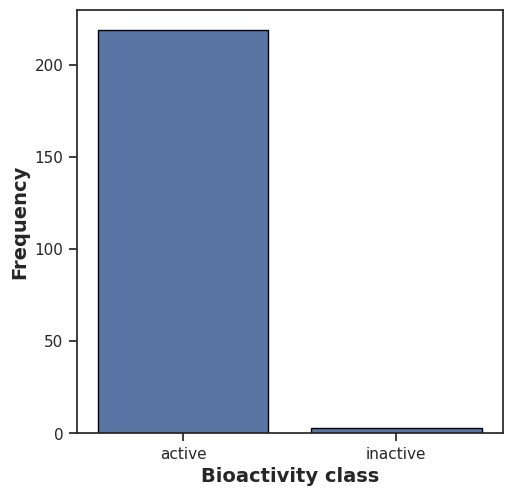

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

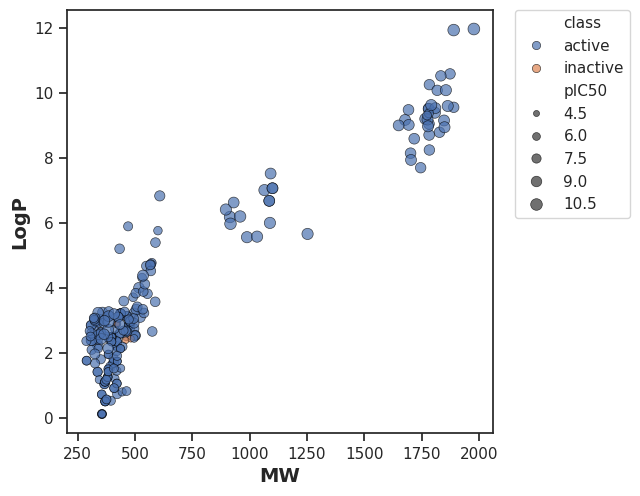

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

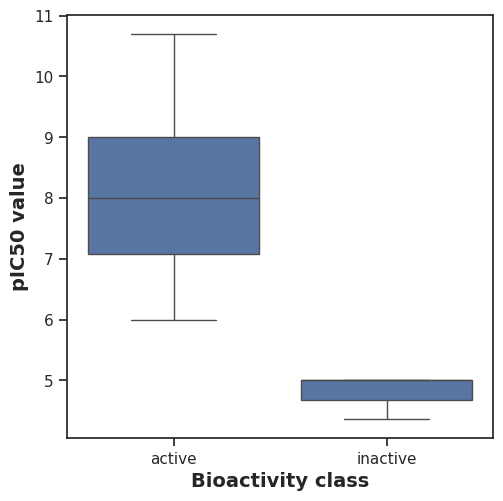

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [44]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,657.0,0.002979,0.05,Different distribution (reject H0)


#### **MW**

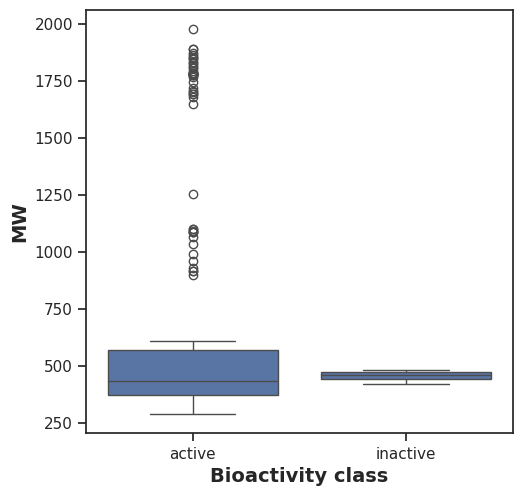

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [46]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,294.0,0.758302,0.05,Same distribution (fail to reject H0)


#### **LogP**

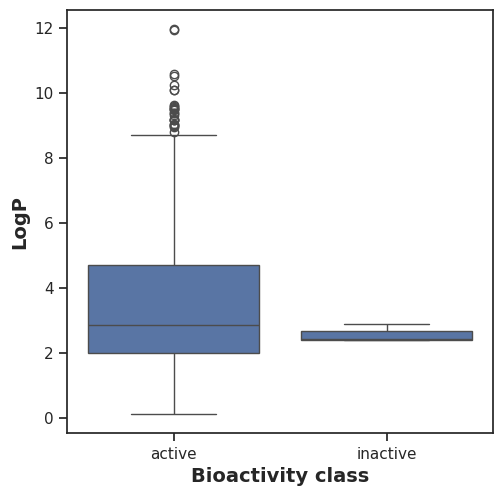

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [48]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,394.5,0.553317,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

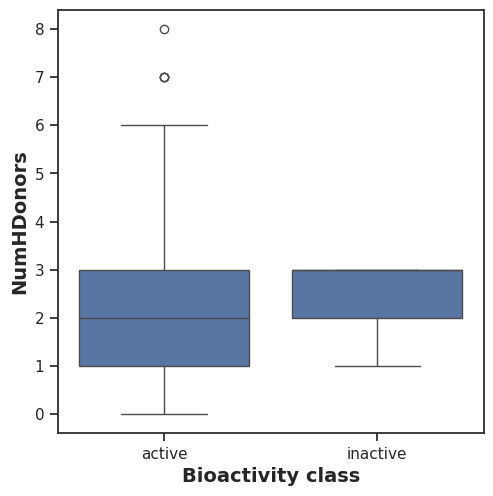

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [50]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,290.5,0.724217,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

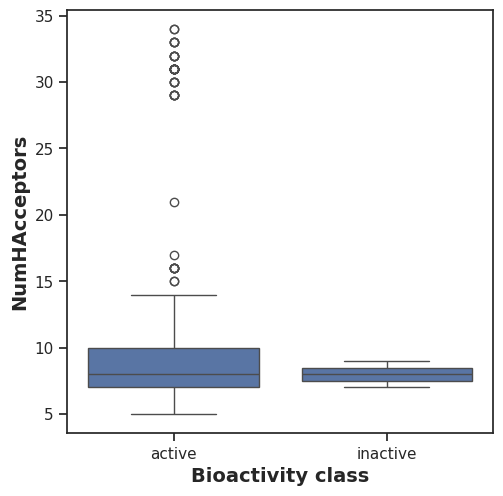

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [52]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,368.0,0.719993,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [53]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 10%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mTORC1_05_bioactivity_data_2class_pIC50.csv (deflated 80%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mTORC1_04_bioactivity_data_3class_pIC50.csv (deflated 80%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mTORC1_03_bioactivity_data_curated.csv (deflated 85%)
